In [44]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [46]:
# Importing dataset
df = pd.read_csv("respiratory symptoms and treatment.csv")

### Working with normal EDA

In [47]:
# The dimensions
df.shape

(3975, 6)

In [48]:
#Top 4 rows
df.head()

,Symptoms,Age,Sex,Disease,Treatment,Nature
0,coughing,5.0,female,Asthma,Omalizumab,high
1,tight feeling in the chest,4.0,female,Asthma,Mepolizumab,high
2,wheezing,6.0,male,Asthma,Mepolizumab,high
3,shortness of breath,7.0,male,Asthma,Mepolizumab,high
4,shortness of breath,9.0,male,Asthma,Mepolizumab,high


In [49]:
#info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symptoms   3907 non-null   object 
 1   Age        3939 non-null   float64
 2   Sex        3877 non-null   object 
 3   Disease    3941 non-null   object 
 4   Treatment  3673 non-null   object 
 5   Nature     3767 non-null   object 
dtypes: float64(1), object(5)
memory usage: 186.5+ KB


In [50]:
# Summary of Statistics
df.describe()

,Age
count,3939.000000
mean,36.641533
std,27.703556
min,1.000000
25%,11.000000
50%,30.000000
75%,62.000000
max,98.000000


#### Checking for outliers


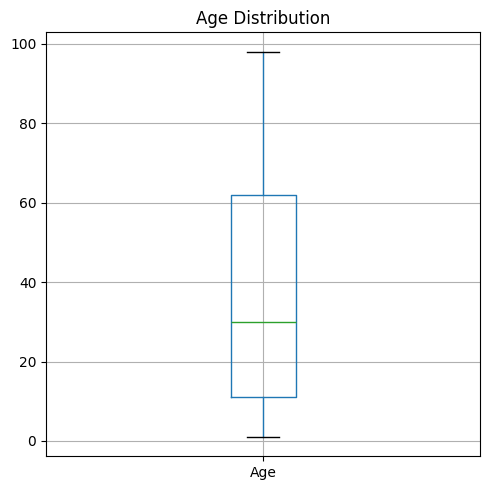

In [51]:
# Checking for outliers


columns = ['Age']

# Creating subplot
plt.figure(figsize=(5, 5))
df.boxplot(column=columns)
plt.title('Age Distribution')
plt.grid(True)

plt.tight_layout()
plt.show()


#### Checking for missing values

In [52]:
df.isnull().sum()


Symptoms      68
Age           36
Sex           98
Disease       34
Treatment    302
Nature       208
dtype: int64

In [53]:
# Now working with the missing numerical values (Age)

median1 = df["Age"].median()
df["Age"].replace(np.nan, median1, inplace=True)

# Now working with missing categorical values (Symptoms, Sex, Disease, Treatment, Nature)

mode1 = df["Symptoms"].mode()[0]
mode2 = df["Sex"].mode()[0]
mode3 = df["Disease"].mode()[0]
mode4 = df["Treatment"].mode()[0]
mode5 = df["Nature"].mode()[0]


df["Symptoms"].replace(np.nan, mode1, inplace=True)
df["Sex"].replace(np.nan, mode2, inplace=True)
df["Disease"].replace(np.nan, mode3, inplace=True)
df["Treatment"].replace(np.nan, mode4, inplace=True)
df["Nature"].replace(np.nan, mode5, inplace=True)



In [54]:
# Checking again for missing values
df.isnull().sum()

Symptoms     0
Age          0
Sex          0
Disease      0
Treatment    0
Nature       0
dtype: int64

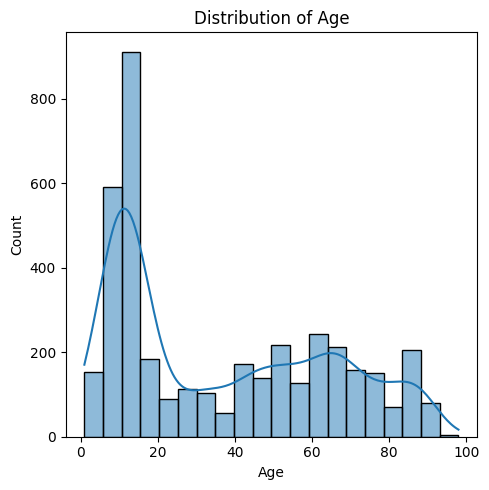

In [55]:
# Visualizing distributions after outlier treatment
#For numerical columns
columns = ['Age']  
n = len(columns)

fig, axes = plt.subplots(1, n, figsize=(5*n, 5))

if n == 1:
    axes = [axes]  # Make axes iterable if only one plot

for i, col in enumerate(columns):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


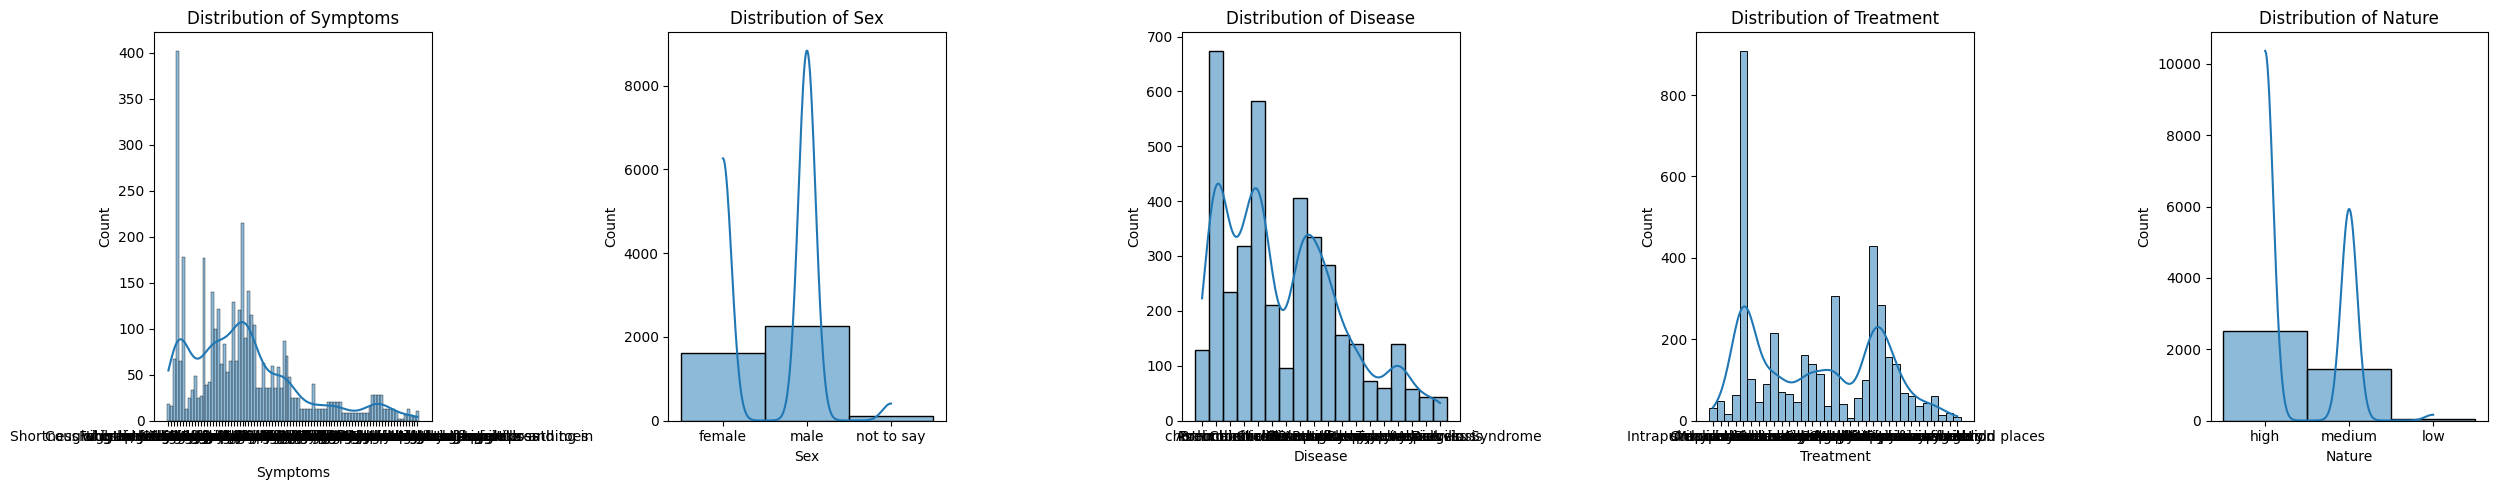

In [56]:
#For categorical columns
columns = ['Symptoms','Sex','Disease','Treatment','Nature']  # Replace with your column names
n = len(columns)

fig, axes = plt.subplots(1, n, figsize=(5*n, 5))

if n == 1:
    axes = [axes]  # Make axes iterable if only one plot

for i, col in enumerate(columns):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()



In [63]:
#Encoding Categorical Columns
df_encoded = pd.get_dummies(df, columns=['Sex', 'Symptoms','Disease','Treatment','Nature'])


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symptoms   3975 non-null   int64  
 1   Age        3975 non-null   float64
 2   Sex        3975 non-null   int64  
 3   Disease    3975 non-null   int64  
 4   Treatment  3975 non-null   int64  
 5   Nature     3975 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 186.5 KB


### Scaling


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded['Age'] = scaler.fit_transform(df_encoded[['Age']])



In [66]:
X = df_encoded.values  # now X has same number of rows as df


In [67]:
# Now checking if rows match
print(X.shape, df.shape) 


(3975, 143) (3975, 6)


### Importing K-Means Clustering

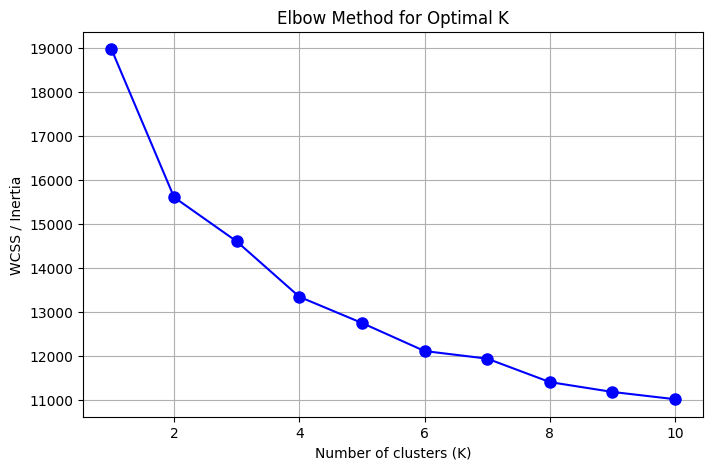

In [77]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-Cluster Sum of Squares
K_range = range(1,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=23)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ = sum of squared distances to centroid

# Plot Elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS / Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


### As we can see K = 4 is the Elbow point

In [82]:
#Fitting K-Means with the chosen K

from sklearn.cluster import KMeans

k_opt = 4 # replace with the K from elbow
kmeans = KMeans(n_clusters=k_opt, random_state=23)
kmeans.fit(X)  # X = preprocessed numeric matrix


,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,23
,copy_x,True
,algorithm,'lloyd'


In [83]:
df['Cluster'] = kmeans.labels_


In [84]:
# Counting of patients per cluster
print(df['Cluster'].value_counts())

# Comparing clusters with Disease
pd.crosstab(df['Cluster'], df['Disease'])

# Comparing clusters with Treatment
pd.crosstab(df['Cluster'], df['Treatment'])


Cluster
1    1335
0    1207
3     909
2     524
Name: count, dtype: int64


Treatment,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0,10,0,0,195,0,48,30,52,3,...,9,10,100,28,12,78,0,15,6,15
1,4,35,0,0,110,5,92,15,8,28,...,8,4,55,16,24,90,10,5,2,25
2,44,170,0,20,0,55,0,0,0,9,...,0,0,0,0,0,3,4,25,0,0
3,20,215,5,35,0,40,0,0,0,9,...,0,0,5,0,0,45,4,25,0,25


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clusters Visualization')
plt.grid(True)
plt.show()
